3.Import the required packages with their customary aliases as follows

In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
5.How many rows and columns are in `gdp_df`? What are the data types of each column?

In [2]:
gdp_df= pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df)
print(gdp_df.info())

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2021  1517.016266              NaN
1        Afghanistan  2020  1968.341002              NaN
2        Afghanistan  2019  2079.921861              NaN
3        Afghanistan  2018  2060.698973              NaN
4        Afghanistan  2017  2096.093111              NaN
...              ...   ...          ...              ...
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN

[7662 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 

6.Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [3]:
gdp_df=gdp_df.drop(columns=['Value Footnotes'])
gdp_df=gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_Per_Capita'})
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


7.How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [4]:
gdp_df['country_count']=gdp_df['Country'].groupby(gdp_df['Country']).transform('count')
missing_list=gdp_df[gdp_df['country_count']<33]
missing_list.Country
missing_country_list=missing_list.drop_duplicates(subset=['Country'])
complete_list=gdp_df[gdp_df['country_count']==33]
completed_list=complete_list.drop_duplicates(subset=['Country'])

print(missing_country_list.info())
print(completed_list.info())

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 7534
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         40 non-null     object 
 1   Year            40 non-null     int64  
 2   GDP_Per_Capita  40 non-null     float64
 3   country_count   40 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 20 to 7629
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         202 non-null    object 
 1   Year            202 non-null    int64  
 2   GDP_Per_Capita  202 non-null    float64
 3   country_count   202 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB
None


9.What was the median GDP per capita value in 2020?

In [5]:
year_2020=gdp_df.loc[gdp_df['Year']==2020]
med_gdp_2020=year_2020['GDP_Per_Capita'].median()
med_gdp_2020

13357.997573370474

10.For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [6]:
decades=gdp_df.loc[gdp_df['Year'].isin([1990,2000,2010,2020])]
decades=decades.drop(columns=['country_count'])
decades['med_gdp']=decades['GDP_Per_Capita'].groupby(decades['Year']).transform('median')

 A boxplot 

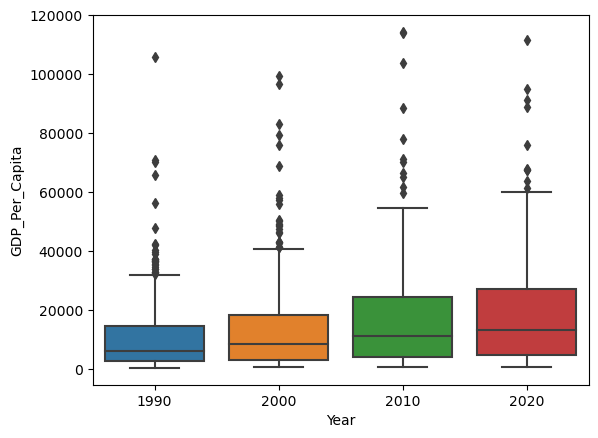

In [7]:
sns.boxplot(x='Year', y='GDP_Per_Capita', data=decades)
plt.show()

A barplot 

<BarContainer object of 921 artists>

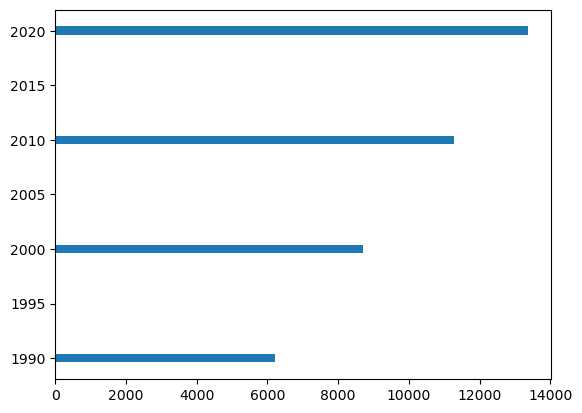

In [8]:
decades=decades.sort_values(by=['Year'])
plt.barh(decades.Year,decades.med_gdp)

A scatterplot

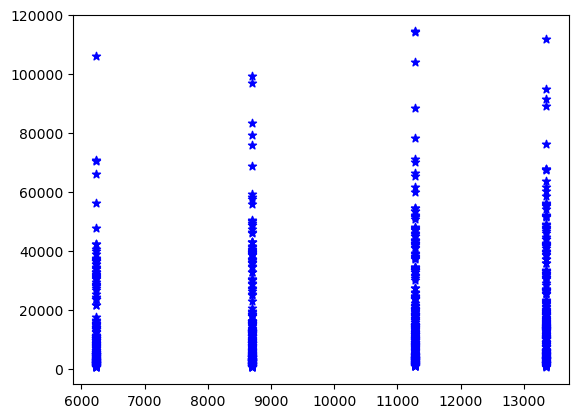

In [9]:
x=decades['med_gdp']
y=decades['GDP_Per_Capita']

plt.scatter(x,y,
            c="blue",
           marker="*")

plt.show()

A scatterplot with a trend line overlaid

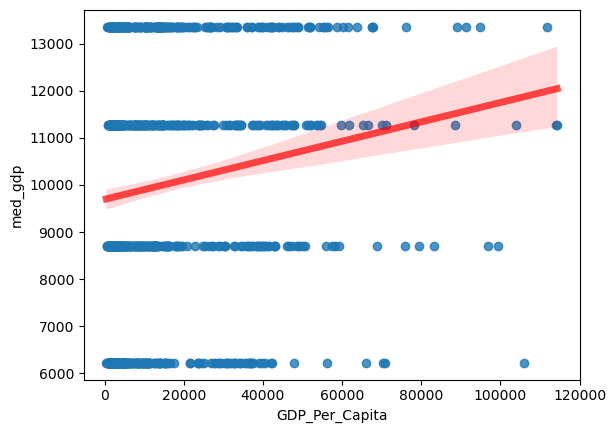

In [10]:
sns.regplot(x=decades['GDP_Per_Capita'], y=decades['med_gdp'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

11.Which country was the first to have a GDP per capita greater than $100,000?

In [11]:
gdp_over_100k=gdp_df.loc[gdp_df['GDP_Per_Capita']>100000]
earliest_yr=gdp_over_100k.sort_values(by=['Year'])
print(earliest_yr.iloc[0])

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
country_count                       33
Name: 7302, dtype: object


12.Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Country              Luxembourg
Year                       2020
GDP_Per_Capita    111751.314751
country_count                33
Name: 4148, dtype: object


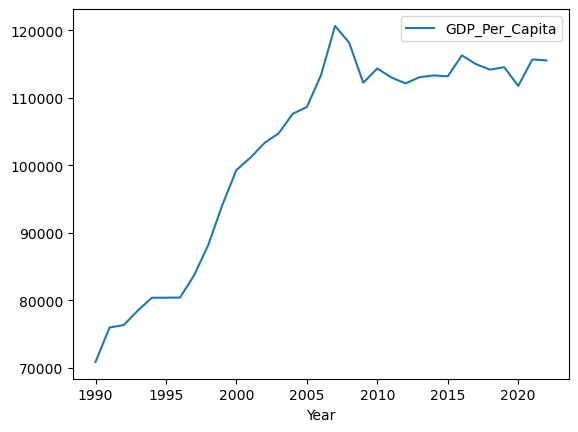

In [12]:
year_2020=gdp_df.loc[gdp_df['Year']==2020]
highest_gdp_2020=year_2020.sort_values(by='GDP_Per_Capita', ascending=False)
Luxembourg=gdp_df.loc[gdp_df['Country']=='Luxembourg']
Luxembourg.plot(x='Year',y='GDP_Per_Capita')
print(highest_gdp_2020.iloc[0])

13.Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Country              Burundi
Year                    2020
GDP_Per_Capita    711.355263
country_count             33
Name: 973, dtype: object


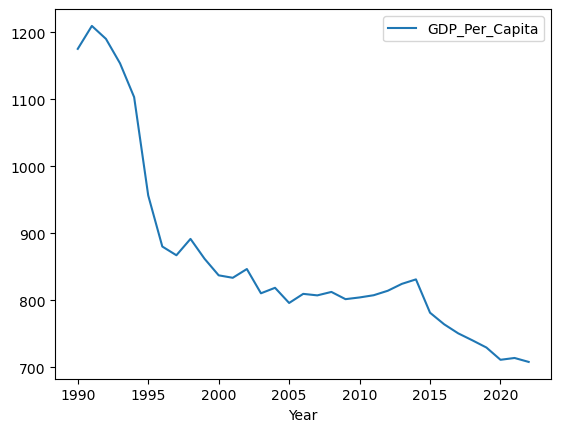

In [13]:
year_2020=gdp_df.loc[gdp_df['Year']==2020]
lowest_gdp_2020=year_2020.sort_values(by='GDP_Per_Capita')
Burundi=gdp_df.loc[gdp_df['Country']=='Burundi']
Burundi.plot(x='Year',y='GDP_Per_Capita')
print(lowest_gdp_2020.iloc[0])


**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

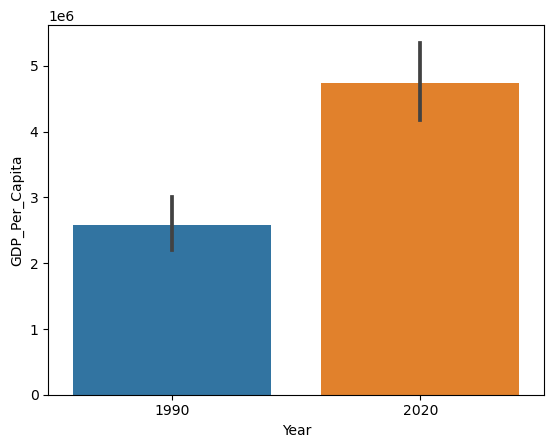

In [14]:
only_90_20=gdp_df.loc[gdp_df['Year'].isin([1990,2020])]
only_90_20.sort_values(by='GDP_Per_Capita',ascending=False)
sns.barplot(only_90_20, x="Year", y="GDP_Per_Capita", estimator='sum')

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [15]:
internet_df= pd.read_csv('../data/internet_use.csv', on_bad_lines='skip')
internet_df=internet_df.iloc[0:4495,:]
print(internet_df)

     Country or Area  Year     Value  Value Footnotes
0        Afghanistan  2014  6.390000              NaN
1        Afghanistan  2013  5.900000              NaN
2        Afghanistan  2012  5.454545              NaN
3        Afghanistan  2011  5.000000              NaN
4        Afghanistan  2010  4.000000              NaN
...              ...   ...       ...              ...
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN

[4495 rows x 4 columns]


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [16]:
internet_df=internet_df.drop(columns=['Value Footnotes'])
internet_df=internet_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'Internet_Users_Pct'})
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]


16.Look at the number of observations in this dataset per year. What do you notice?

17.What is the first year to have a non-zero internet users percentage value?

In [17]:
first_over_0=internet_df.loc[internet_df['Internet_Users_Pct']>0.0]
earliest_yr=first_over_0.sort_values(by=['Year'])
print(earliest_yr.iloc[0])

Country                  Italy
Year                      1990
Internet_Users_Pct    0.017545
Name: 2048, dtype: object


18.How does the distribution of internet users percent differ for 2000 and 2014?

In [18]:
internet_df["Year"] = internet_df["Year"].apply(int)
yr_2000=internet_df.loc[internet_df['Year']==2000]
yr_2014=internet_df.loc[internet_df['Year']==2014]
merged_df=pd.merge(yr_2000, yr_2014, on=['Country'], how='inner')
merged_df['Diff']=merged_df['Internet_Users_Pct_y']-merged_df['Internet_Users_Pct_x']
merged_df

,Country,Year_x,Internet_Users_Pct_x,Year_y,Internet_Users_Pct_y,Diff
0,Albania,2000,0.114097,2014,60.10,59.985903
1,Algeria,2000,0.491706,2014,18.09,17.598294
2,Andorra,2000,10.538836,2014,95.90,85.361164
3,Angola,2000,0.105046,2014,21.26,21.154954
4,Antigua and Barbuda,2000,6.482226,2014,64.00,57.517774
...,...,...,...,...,...,...
188,Viet Nam,2000,0.254248,2014,48.31,48.055752
189,Virgin Islands (U.S.),2000,13.815081,2014,50.07,36.254919
190,Yemen,2000,0.082500,2014,22.55,22.467500
191,Zambia,2000,0.191072,2014,17.34,17.148928


19. For how many countries was the percentage of internet users below 5% in 2014?

In [19]:
less_than_5=yr_2014.loc[yr_2014['Internet_Users_Pct']<5.0]
less_than_5[less_than_5.columns[0]].count()

16

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [20]:
gdp_and_internet_use=pd.merge(gdp_df, internet_df, on=['Country','Year'], how='left')
gdp_and_internet_use=gdp_and_internet_use.drop(columns=['country_count'])
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,0.001739
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [21]:
year_2014=gdp_and_internet_use.loc[gdp_and_internet_use['Year']==2014]
highest_internet_14=year_2014.sort_values(by='Internet_Users_Pct', ascending=False)
highest_gdp_14=year_2014.sort_values(by='GDP_Per_Capita', ascending=False)
print(highest_internet_14.iloc[0:3])
print(highest_gdp_14.iloc[0:3])


      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2993  Iceland  2014    50450.741612               98.16
687   Bermuda  2014    77361.104881               96.80
5212   Norway  2014    62838.515727               96.30
               Country  Year  GDP_Per_Capita  Internet_Users_Pct
4187  Macao SAR, China  2014   151616.402364                 NaN
4154        Luxembourg  2014   113313.578898               94.67
5752             Qatar  2014   106141.326189               91.49


22.  Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [22]:
gdp_and_internet_use_2014=year_2014
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09
...,...,...,...,...
7509,Viet Nam,2014,7641.909252,48.31
7542,West Bank and Gaza,2014,5967.073437,NaN
7571,World,2014,15120.730322,NaN
7604,Zambia,2014,3375.941270,17.34


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

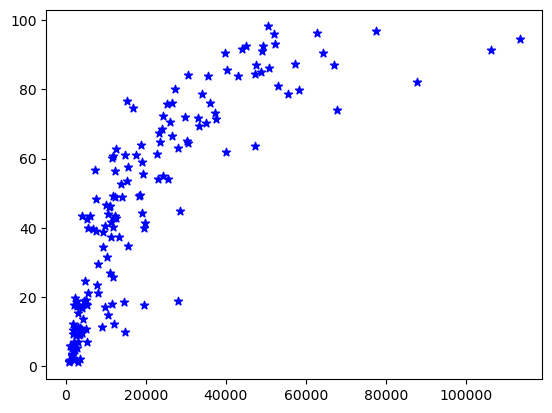

In [23]:
x=gdp_and_internet_use_2014['GDP_Per_Capita']
y=gdp_and_internet_use_2014['Internet_Users_Pct']
y2=gdp_and_internet_use_2014['Country']
plt.scatter(x,y,
            c="blue",
           marker="*")

plt.show()